In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
#import random
%matplotlib inline
from matplotlib import animation
from matplotlib.widgets import Slider
from ipywidgets import interact, interactive, fixed
import scipy.integrate as integrate
import scipy.special as ss

from matplotlib import animation
from IPython.display import HTML

In [2]:
def HOWvfn(n,x):
    return (np.pi)**(-.25)*(1/np.sqrt(2**n*np.math.factorial(n)))*ss.hermite(n)(x)*np.exp(-x*x/2)
    
def c_n(alpha,n):
    return (alpha**n/np.sqrt(np.math.factorial(n)))*np.exp(-alpha**2/2)

In [3]:
def prob(m=10,alpha=2):
    k = range(0,m)
    #alpha=3
    p=np.zeros(m)
    for i in range(0,m):
        p[i] = (c_n(alpha,k[i]))**2
    plt.scatter(k,p)
interact(prob,m=(10,16,1),alpha=(0,4,0.25))

A Jupyter Widget

<function __main__.prob>

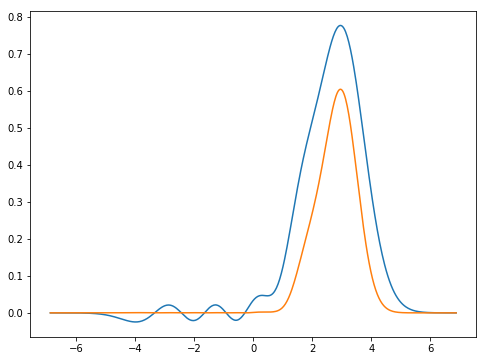

In [4]:
myfigsize=(8,6);

n=10
a=np.sqrt(2*n+1)
x_s=500
x = np.linspace(-3*a/2, 3*a/2, x_s)
 
n=0
alpha=2

psi0=c_n(alpha,n)*(HOWvfn(n,x))
for i in range(1,10):
    psi0=psi0+c_n(alpha,i)*(HOWvfn(i,x))
                   
fig1 = plt.figure(figsize=myfigsize);
plt.plot(x,psi0, x, psi0**2)
#plt.plot(x,psi0**2)
ax=plt.gca()
#ax.axvline(x=a,color='red')
#ax.axvline(x=-a,color='red')

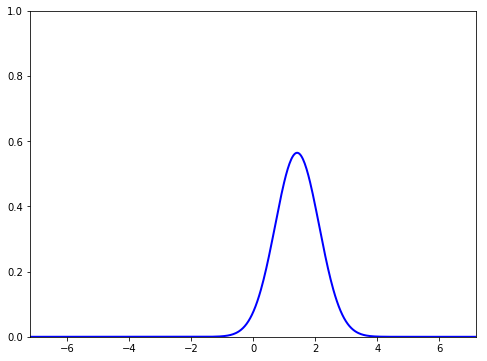

In [6]:
n=10
a=np.sqrt(2*(n+1)+1)
x_s=500
x = np.linspace(-3*a/2, 3*a/2, x_s)

#outerlim = 0.6
fig2 = plt.figure(figsize=myfigsize);
ax = plt.axes(xlim=(-3*a/2, 3*a/2), ylim=(0, 1));
line, = ax.plot([], [], lw=2, color='blue');

#timestep that changes the time step between frames
tstep=5

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

def HOWvfnt(n,x,t):
    return (np.pi)**(-.25)*(1/np.sqrt(2**n*np.math.factorial(n)))*ss.hermite(n)(x)*np.exp(-x*x/2)*np.exp(1j*(n+0.5)*t)

n=0
alpha=1

def animate(t):
    #x = np.linspace(-a/2, a/2, x_s)
    psi = c_n(alpha,n)*(HOWvfnt(n,x,t/tstep))
    for i in range(1,15):
        psi= psi+ c_n(alpha,i)*(HOWvfnt(i,x,t/tstep))
    
    y=np.real(psi*np.conj(psi));      

    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig2, animate, init_func=init,
                               frames=64, interval=50, blit=True);
HTML(ani.to_jshtml())
#ani